In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

Create a randome sample of blobs:
* Set of 100
* 2 dimensional set
* 2 main centers (average sets)
* create sets with gaussian properties (normal distribution defined by avg and std only)
* Each cluster will have a std of 1.5

In [3]:
from sklearn.datasets import make_blobs

X is the dimensional data in arrays
y is the classification (an array of 1s and 0s)

In [9]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

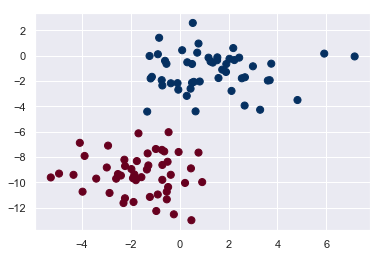

In [11]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')

Imagine the center of each cluster as an avg, with radiating std rings. The closer to the center, the more sure of our classification. Our rings will be based on Gaussian stats (normal distribution)

In [12]:
from sklearn.naive_bayes import GaussianNB

In [15]:
model = GaussianNB()
model.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

Now create some randome numbers and see which class it belongs to

In [24]:
random_library = np.random.RandomState(0)
Xnew = [-6,-14] + [14,18] * random_library.rand(2000,2) #array of 2000 with 2 dimensional data
Xnew[:4]

array([[ 1.68338905, -1.12659141],
       [ 2.43868727, -4.19210271],
       [-0.06883281, -2.37390596],
       [ 0.12622096,  2.05191401]])

In [25]:
ynew = model.predict(Xnew)

In [26]:
ynew[:4]

array([1, 1, 1, 1])

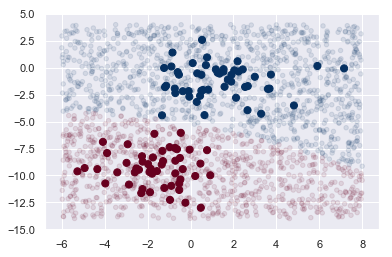

In [33]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1], c=ynew, s=20, cmap='RdBu', alpha=0.1)

Turn the model into a probabilistic model (bounded by 0 and 1)

In [34]:
yprob = model.predict_proba(Xnew)

In [40]:
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])